In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

### hero data
https://api.opendota.com/api/players/82195706/heroes <br>
curl -o 82195706_hero.json https://api.opendota.com/api/players/82195706/heroes

In [2]:
hero_stats=pd.read_json('./82195706_hero.json',orient='columns')
hero_stats

,hero_id,last_played,games,win,with_games,with_win,against_games,against_win
0,26,1581110512,104,44,114,54,159,73
1,16,1577985799,98,49,65,30,120,56
2,79,1579031895,82,42,36,18,47,26
3,28,1580670492,69,44,63,22,109,54
4,52,1567704434,64,31,35,14,54,31
...,...,...,...,...,...,...,...,...
114,34,0,0,0,99,45,89,43
115,74,0,0,0,188,74,184,95
116,109,0,0,0,47,20,52,27
117,120,0,0,0,17,6,12,6


In [3]:
hero_names=pd.read_json('./hero_names.json',orient='columns')
hero_names.head()

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler]",2
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2


In [4]:
hero_stats=pd.merge(hero_stats,hero_names,left_on='hero_id',right_on='id',how='inner',indicator=True)

In [5]:
hero_stats.head()

,hero_id,last_played,games,win,with_games,with_win,against_games,against_win,id,name,localized_name,primary_attr,attack_type,roles,legs,_merge
0,26,1581110512,104,44,114,54,159,73,26,npc_dota_hero_lion,Lion,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2,both
1,16,1577985799,98,49,65,30,120,56,16,npc_dota_hero_sand_king,Sand King,str,Melee,"[Initiator, Disabler, Support, Nuker, Escape, ...",6,both
2,79,1579031895,82,42,36,18,47,26,79,npc_dota_hero_shadow_demon,Shadow Demon,int,Ranged,"[Support, Disabler, Initiator, Nuker]",2,both
3,28,1580670492,69,44,63,22,109,54,28,npc_dota_hero_slardar,Slardar,str,Melee,"[Carry, Durable, Initiator, Disabler, Escape]",0,both
4,52,1567704434,64,31,35,14,54,31,52,npc_dota_hero_leshrac,Leshrac,int,Ranged,"[Carry, Support, Nuker, Pusher, Disabler]",4,both


### Roles

In [6]:
hero_stats['roles'][0]

['Support', 'Disabler', 'Nuker', 'Initiator']

In [7]:
hero_stats_roles=pd.DataFrame(hero_stats['roles'].values.tolist(), columns=['1_role','2_role','3_role','4_role','5_role','6_role'])

In [8]:
hero_stats_roles

,1_role,2_role,3_role,4_role,5_role,6_role
0,Support,Disabler,Nuker,Initiator,None,None
1,Initiator,Disabler,Support,Nuker,Escape,Jungler
2,Support,Disabler,Initiator,Nuker,None,None
3,Carry,Durable,Initiator,Disabler,Escape,None
4,Carry,Support,Nuker,Pusher,Disabler,None
...,...,...,...,...,...,...
114,Carry,Nuker,Pusher,None,None,None
115,Carry,Nuker,Disabler,Escape,Pusher,None
116,Carry,Pusher,Nuker,None,None,None
117,Carry,Nuker,Disabler,Durable,Escape,Initiator


In [9]:
hero_stats_roles['1_role'].value_counts(dropna=False)

Carry        63
Support      35
Initiator    11
Nuker         5
Disabler      3
Durable       1
Escape        1
Name: 1_role, dtype: int64

In [10]:
hero_stats_roles['2_role'].value_counts(dropna=False)

Nuker        28
Disabler     23
Escape       17
Durable      12
Initiator    11
Pusher       10
Support       8
Jungler       7
Carry         2
NaN           1
Name: 2_role, dtype: int64

In [11]:
hero_stats_roles['3_role'].value_counts(dropna=False)

Disabler     34
Nuker        23
Durable      16
Initiator    12
Pusher       11
NaN          10
Escape        8
Jungler       4
Support       1
Name: 3_role, dtype: int64

In [12]:
hero_stats[hero_stats_roles['3_role'].isnull()]

,hero_id,last_played,games,win,with_games,with_win,against_games,against_win,id,name,localized_name,primary_attr,attack_type,roles,legs,_merge
11,45,1580928864,46,18,44,18,65,34,45,npc_dota_hero_pugna,Pugna,int,Ranged,"[Nuker, Pusher]",2,both
13,44,1577745973,33,11,155,80,229,115,44,npc_dota_hero_phantom_assassin,Phantom Assassin,agi,Melee,"[Carry, Escape]",2,both
20,62,1582566201,28,17,118,54,137,72,62,npc_dota_hero_bounty_hunter,Bounty Hunter,agi,Melee,"[Escape, Nuker]",2,both
21,31,1578777949,27,11,59,34,79,31,31,npc_dota_hero_lich,Lich,int,Ranged,"[Support, Nuker]",2,both
31,35,1582911840,23,14,142,74,270,140,35,npc_dota_hero_sniper,Sniper,agi,Ranged,"[Carry, Nuker]",2,both
40,22,1582149912,20,16,91,47,141,50,22,npc_dota_hero_zuus,Zeus,int,Ranged,[Nuker],2,both
42,63,1569694813,20,8,97,51,108,64,63,npc_dota_hero_weaver,Weaver,agi,Ranged,"[Carry, Escape]",4,both
71,46,1488475342,11,5,90,40,86,49,46,npc_dota_hero_templar_assassin,Templar Assassin,agi,Ranged,"[Carry, Escape]",2,both
88,105,1503938991,7,7,29,14,33,14,105,npc_dota_hero_techies,Techies,int,Ranged,"[Nuker, Disabler]",6,both
113,11,0,0,0,109,65,129,61,11,npc_dota_hero_nevermore,Shadow Fiend,agi,Ranged,"[Carry, Nuker]",0,both


In [13]:
hero_stats=pd.concat([hero_stats,hero_stats_roles],axis=1)
hero_stats.head()

,hero_id,last_played,games,win,with_games,with_win,against_games,against_win,id,name,...,attack_type,roles,legs,_merge,1_role,2_role,3_role,4_role,5_role,6_role
0,26,1581110512,104,44,114,54,159,73,26,npc_dota_hero_lion,...,Ranged,"[Support, Disabler, Nuker, Initiator]",2,both,Support,Disabler,Nuker,Initiator,None,None
1,16,1577985799,98,49,65,30,120,56,16,npc_dota_hero_sand_king,...,Melee,"[Initiator, Disabler, Support, Nuker, Escape, ...",6,both,Initiator,Disabler,Support,Nuker,Escape,Jungler
2,79,1579031895,82,42,36,18,47,26,79,npc_dota_hero_shadow_demon,...,Ranged,"[Support, Disabler, Initiator, Nuker]",2,both,Support,Disabler,Initiator,Nuker,None,None
3,28,1580670492,69,44,63,22,109,54,28,npc_dota_hero_slardar,...,Melee,"[Carry, Durable, Initiator, Disabler, Escape]",0,both,Carry,Durable,Initiator,Disabler,Escape,None
4,52,1567704434,64,31,35,14,54,31,52,npc_dota_hero_leshrac,...,Ranged,"[Carry, Support, Nuker, Pusher, Disabler]",4,both,Carry,Support,Nuker,Pusher,Disabler,None


In [14]:
hero_stats.columns

Index(['hero_id', 'last_played', 'games', 'win', 'with_games', 'with_win',
       'against_games', 'against_win', 'id', 'name', 'localized_name',
       'primary_attr', 'attack_type', 'roles', 'legs', '_merge', '1_role',
       '2_role', '3_role', '4_role', '5_role', '6_role'],
      dtype='object')

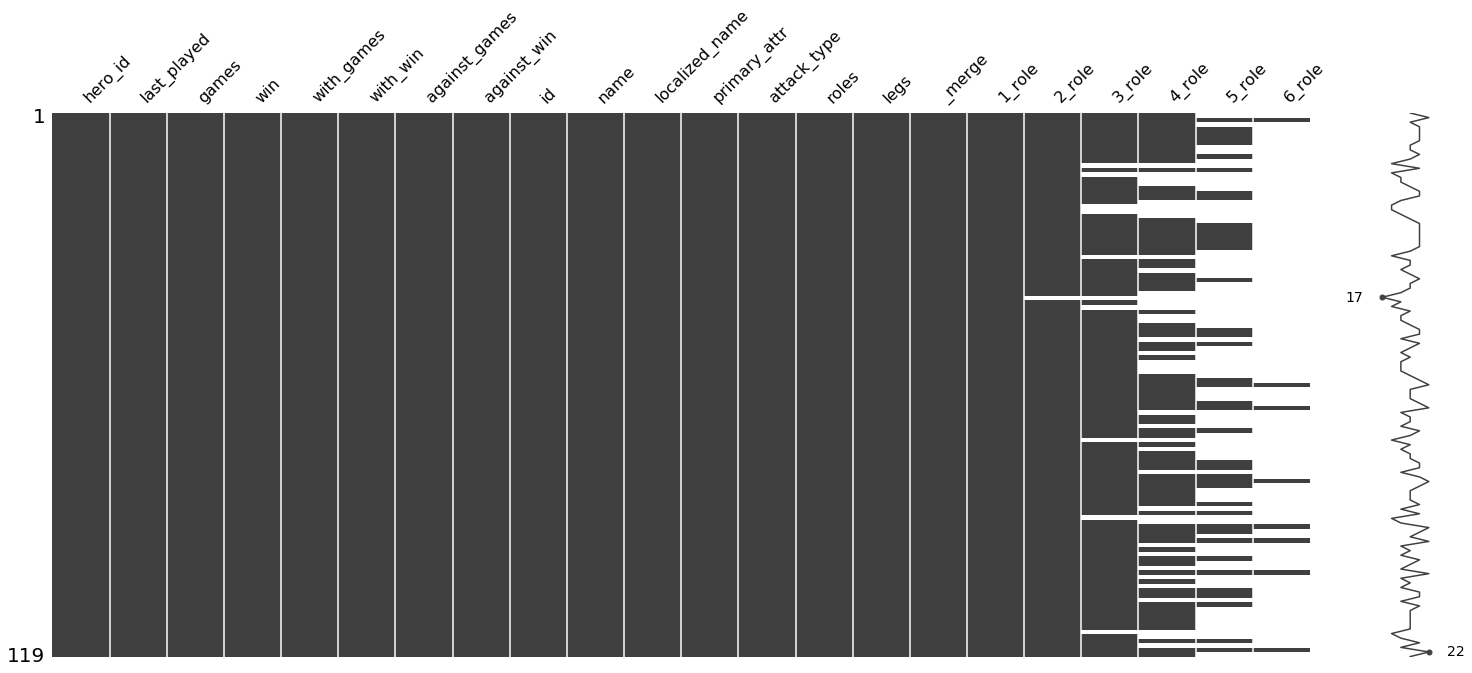

In [15]:
import missingno
missingno.matrix(hero_stats)

In [16]:
hero_model=hero_stats.drop(['hero_id','last_played','id','name','localized_name','roles','legs','_merge','4_role','5_role','6_role'],axis=1)

In [17]:
hero_model.head()

,games,win,with_games,with_win,against_games,against_win,primary_attr,attack_type,1_role,2_role,3_role
0,104,44,114,54,159,73,int,Ranged,Support,Disabler,Nuker
1,98,49,65,30,120,56,str,Melee,Initiator,Disabler,Support
2,82,42,36,18,47,26,int,Ranged,Support,Disabler,Initiator
3,69,44,63,22,109,54,str,Melee,Carry,Durable,Initiator
4,64,31,35,14,54,31,int,Ranged,Carry,Support,Nuker


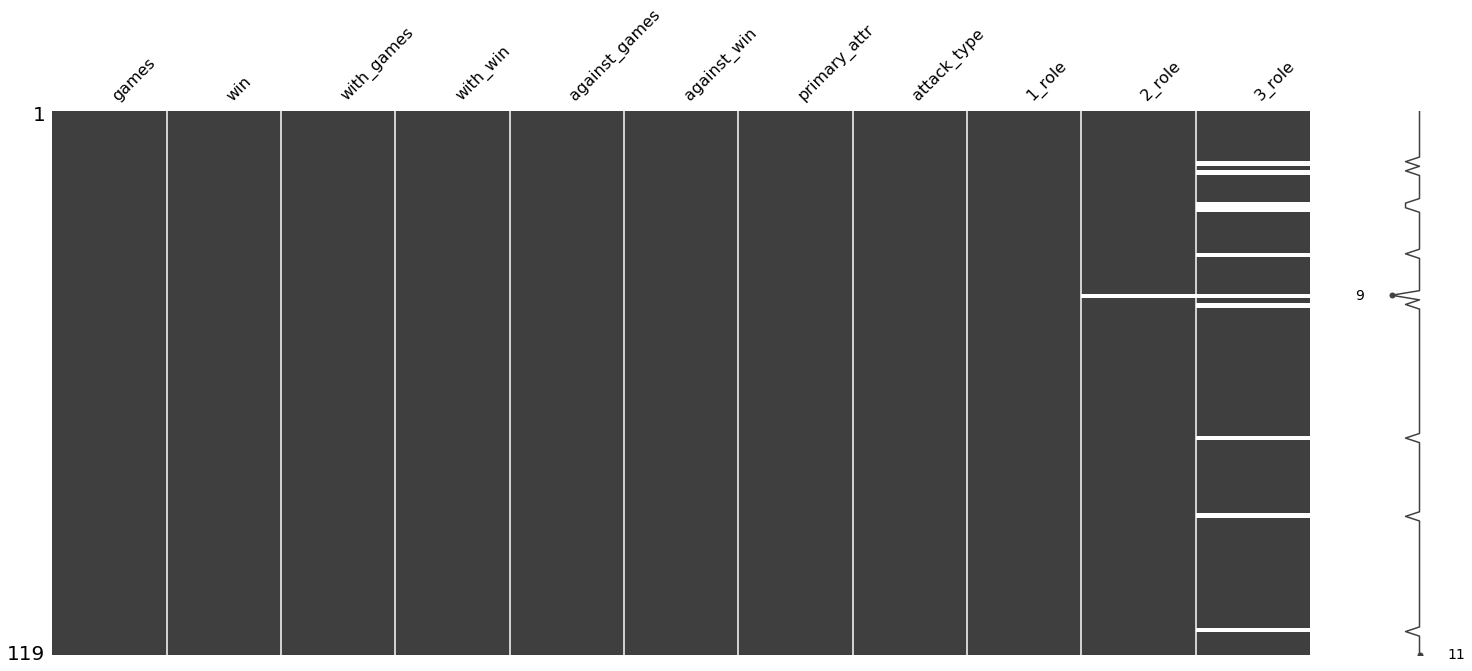

In [18]:
missingno.matrix(hero_model)

In [19]:
hero_model['2_role'].value_counts(dropna=False)

Nuker        28
Disabler     23
Escape       17
Durable      12
Initiator    11
Pusher       10
Support       8
Jungler       7
Carry         2
NaN           1
Name: 2_role, dtype: int64

In [20]:
hero_model['2_role']=hero_model['2_role'].fillna('None')
hero_model['3_role']=hero_model['3_role'].fillna('None')

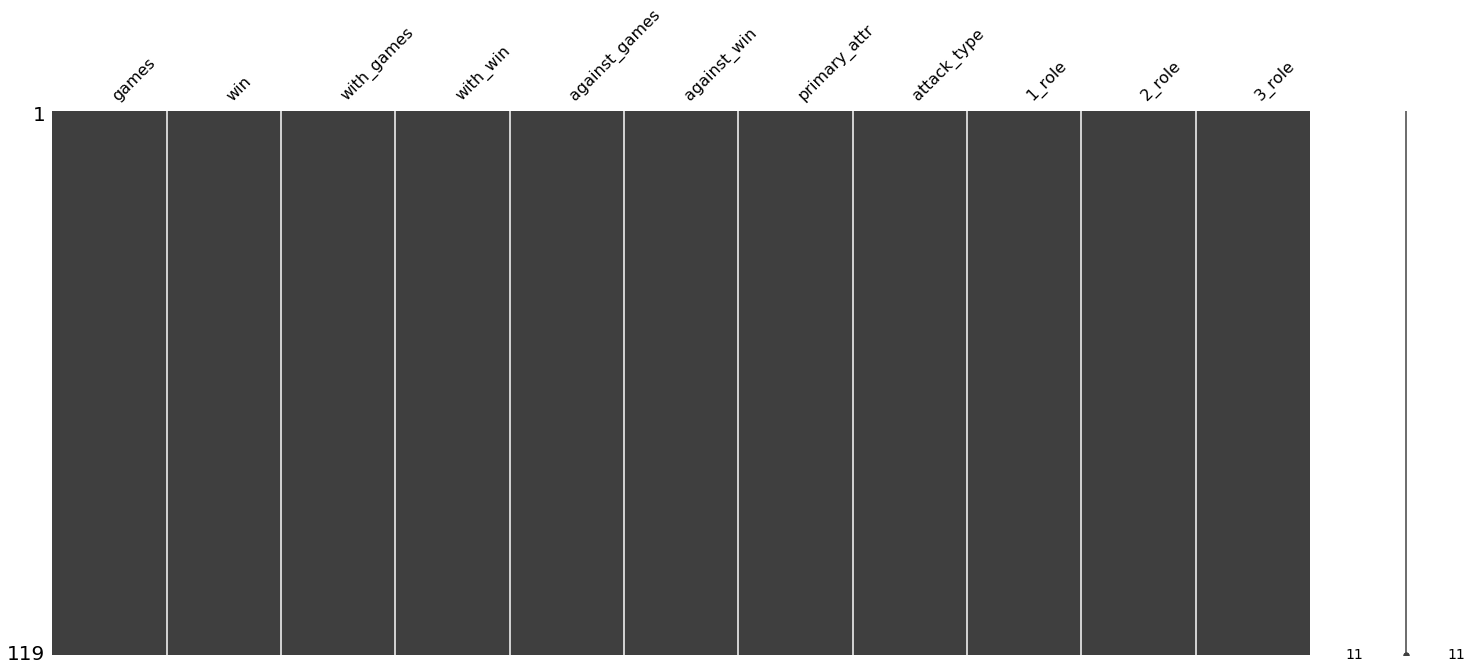

In [21]:
missingno.matrix(hero_model)

In [22]:
hero_model.head()

,games,win,with_games,with_win,against_games,against_win,primary_attr,attack_type,1_role,2_role,3_role
0,104,44,114,54,159,73,int,Ranged,Support,Disabler,Nuker
1,98,49,65,30,120,56,str,Melee,Initiator,Disabler,Support
2,82,42,36,18,47,26,int,Ranged,Support,Disabler,Initiator
3,69,44,63,22,109,54,str,Melee,Carry,Durable,Initiator
4,64,31,35,14,54,31,int,Ranged,Carry,Support,Nuker


In [23]:
hero_model.to_csv('hisheros.csv')

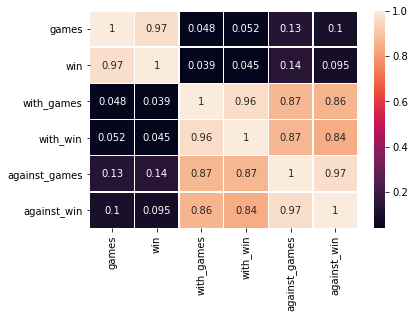

In [24]:
sns.heatmap(hero_model.corr(),annot=True,linewidths=0.3)

In [25]:
pd.options.display.max_columns = 999

In [26]:
hero_model=pd.get_dummies(hero_model, prefix=['primary_attr','attack_type','1_role','2_role','3_role'])
hero_model.head()

,games,win,with_games,with_win,against_games,against_win,primary_attr_agi,primary_attr_int,primary_attr_str,attack_type_Melee,attack_type_Ranged,1_role_Carry,1_role_Disabler,1_role_Durable,1_role_Escape,1_role_Initiator,1_role_Nuker,1_role_Support,2_role_Carry,2_role_Disabler,2_role_Durable,2_role_Escape,2_role_Initiator,2_role_Jungler,2_role_None,2_role_Nuker,2_role_Pusher,2_role_Support,3_role_Disabler,3_role_Durable,3_role_Escape,3_role_Initiator,3_role_Jungler,3_role_None,3_role_Nuker,3_role_Pusher,3_role_Support
0,104,44,114,54,159,73,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,98,49,65,30,120,56,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,82,42,36,18,47,26,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,69,44,63,22,109,54,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,64,31,35,14,54,31,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
X=hero_model

In [29]:
X_sca=sc.fit_transform(X)

## K-Means Cluster to find the Best Performing Heros

In [30]:
from sklearn.cluster import KMeans
kmeans=KMeans()

In [31]:
kmeans=KMeans(n_clusters=2).fit(X_sca)

In [32]:
centroids=kmeans.cluster_centers_

In [33]:
kmeans.labels_

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0])

In [34]:
cluster_range=range(1,20)
cluster_errors=[]

for n_clusters in cluster_range:
    clusters=KMeans(n_clusters)
    clusters.fit(X_sca)
    cluster_errors.append(clusters.inertia_)

In [35]:
clusters_h=pd.DataFrame({'Num_clusters':cluster_range,'Cluster_Error':cluster_errors})
clusters_h.head(10)

,Num_clusters,Cluster_Error
0,1,4403.000000
1,2,3997.442758
2,3,3687.125415
3,4,3509.442504
4,5,3337.885350
5,6,3223.020930
6,7,3070.127210
7,8,2928.254848
8,9,2875.490274
9,10,2726.779177


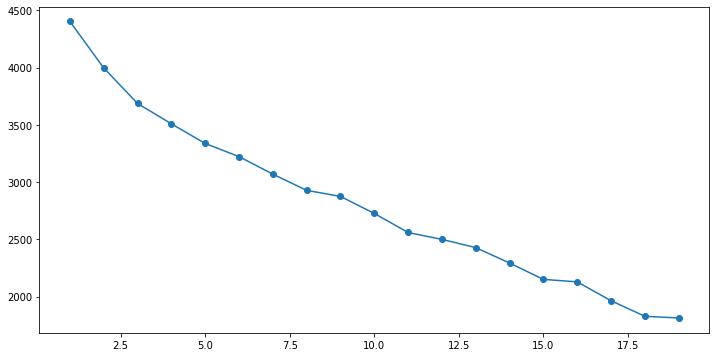

In [36]:
plt.figure(figsize=(12,6))
plt.plot(clusters_h.Num_clusters,clusters_h.Cluster_Error,marker='o')

In [37]:
kmeans=KMeans(n_clusters=5).fit(X_sca)
kmeans.cluster_centers_

array([[-0.16586793, -0.11207725, -0.61761605, -0.65305052, -0.4411461 ,
        -0.53322215, -0.67172875,  0.49679511,  0.1539647 , -0.15812283,
         0.15812283, -1.06066017, -0.16081688, -0.09205746, -0.09205746,
        -0.31914237,  4.77493455, -0.64549722, -0.13074409,  0.01702513,
         0.32930589,  0.16329932, -0.31914237, -0.25      ,  2.09891013,
        -0.5547002 ,  0.41798995, -0.26846242, -0.18973666, -0.39413171,
         0.53021328, -0.33488734, -0.18650096,  1.85975238, -0.48947251,
        -0.31914237, -0.09205746],
       [ 0.01045935,  0.08782854, -0.24001729, -0.21900869,  0.02172984,
        -0.02968462, -0.60626133, -0.75218979,  1.36767091,  0.98227819,
        -0.98227819,  0.03214122, -0.16081688,  0.23990732, -0.09205746,
         0.51783707, -0.20942695, -0.24646258,  0.10499147,  0.27794816,
         0.47019536, -0.40824829,  0.51783707, -0.25      , -0.09205746,
        -0.41182287, -0.19366684,  0.09457199,  0.03833064,  0.49415756,
        -0.26846

In [38]:
y_kmeans=pd.DataFrame(kmeans.labels_)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sca,y_kmeans,test_size=0.25,random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [41]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4),
    DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=4),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [42]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    #print("precision :",precision_score(y_test,y_pred),"\n")
    #print('Recall score:',recall_score(y_test,y_pred),'\n')
    #print("f1 score:",f1_score(y_test,y_pred),"\n")
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

[[ 8  0  0  0]
 [ 0  7  1  0]
 [ 0  0 11  0]
 [ 0  1  0  2]]
accuracy train: 1.0 

accuracy test: 0.9333333333333333 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.88      0.88      0.88         8
           3       0.92      1.00      0.96        11
           4       1.00      0.67      0.80         3

    accuracy                           0.93        30
   macro avg       0.95      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30

-------------------------------------------------------------------------------------------------------
DecisionTreeCl

C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[[ 4  1  1  2]
 [ 0  8  0  0]
 [ 0  0 11  0]
 [ 0  0  0  3]]
accuracy train: 1.0 

accuracy test: 0.8666666666666667 

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         8
           2       0.89      1.00      0.94         8
           3       0.92      1.00      0.96        11
           4       0.60      1.00      0.75         3

    accuracy                           0.87        30
   macro avg       0.85      0.88      0.83        30
weighted avg       0.90      0.87      0.85        30

-------------------------------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

[[ 7  0  1  0]
 [ 2  5  1  0]
 [ 0  0 11  0]
 [ 1  0  1  1]]
accuracy train: 0.9325842696629213 

accuracy test: 0.8 

              precision    recall 

C:\Users\pravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pravi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this be

 0.7 

              precision    recall  f1-score   support

           1       1.00      0.38      0.55         8
           2       0.78      0.88      0.82         8
           3       0.90      0.82      0.86        11
           4       0.25      0.67      0.36         3

    accuracy                           0.70        30
   macro avg       0.73      0.68      0.65        30
weighted avg       0.83      0.70      0.72        30

-------------------------------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample

In [43]:
from scipy.cluster.hierarchy import dendrogram,linkage

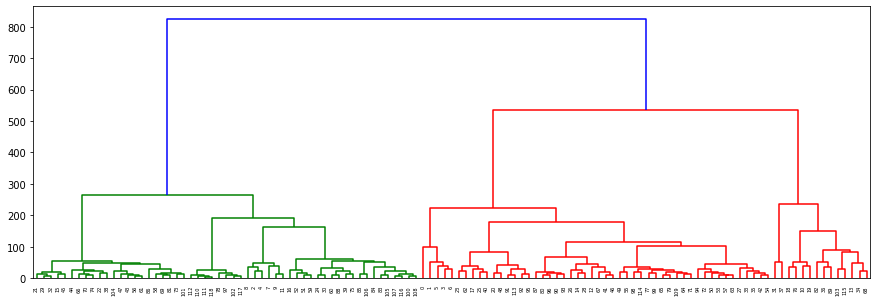

In [44]:
Z=linkage(X,'ward')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

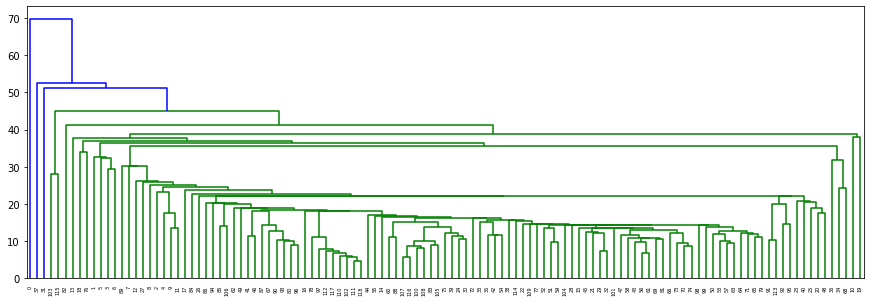

In [45]:
Z=linkage(X,'single')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

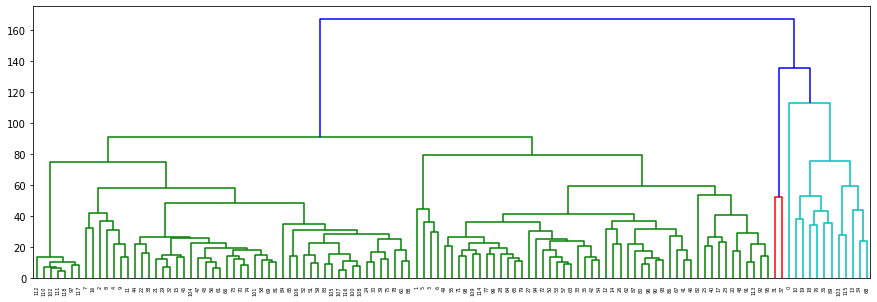

In [46]:
Z=linkage(X,'average')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

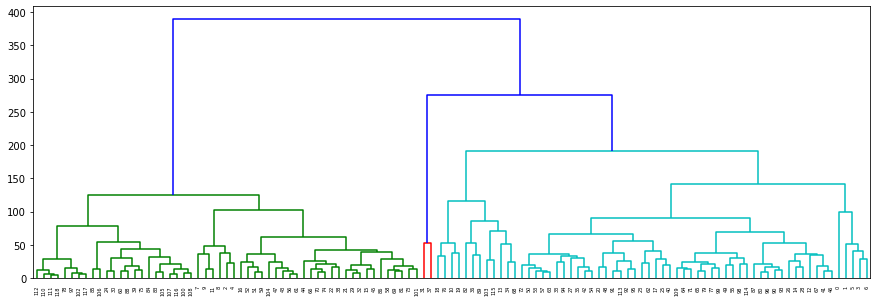

In [47]:
Z=linkage(X,'complete')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

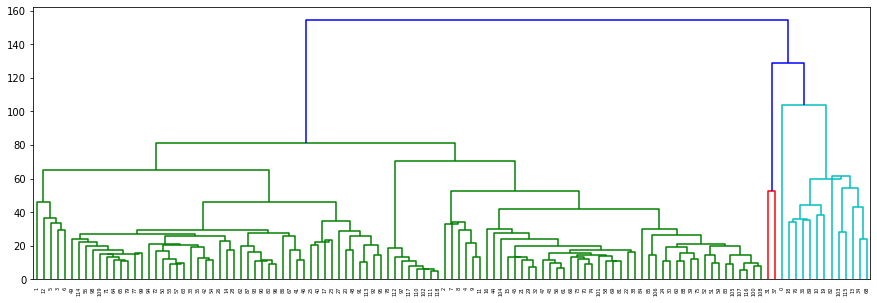

In [48]:
Z=linkage(X,'centroid')
plt.figure(figsize=(15,5))
dendrogram(Z,labels=X.index,leaf_rotation=90)
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',
                               linkage='ward')
cluster.fit_predict(X_sca)

array([4, 0, 0, 0, 2, 4, 4, 4, 0, 2, 4, 3, 1, 2, 2, 4, 4, 1, 2, 4, 2, 4,
       4, 1, 0, 0, 2, 1, 0, 1, 0, 2, 4, 4, 2, 1, 2, 1, 2, 2, 3, 0, 2, 2,
       1, 2, 0, 1, 4, 4, 2, 4, 4, 2, 2, 4, 4, 0, 0, 2, 4, 1, 2, 1, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 4, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 4, 2, 0, 0,
       3, 2, 2, 2, 2, 2, 2, 0, 0, 4, 2, 4, 2, 3, 4, 2, 4, 3, 4, 1, 2, 2,
       4, 2, 4, 2, 2, 4, 2, 2, 1], dtype=int64)

In [50]:
y=cluster.fit_predict(X_sca)

In [51]:
hero_stats[['hero_id','localized_name']]

,hero_id,localized_name
0,26,Lion
1,16,Sand King
2,79,Shadow Demon
3,28,Slardar
4,52,Leshrac
...,...,...
114,34,Tinker
115,74,Invoker
116,109,Terrorblade
117,120,Pangolier


In [52]:
pd.Series(y+1)

0      5
1      1
2      1
3      1
4      3
      ..
114    3
115    5
116    3
117    3
118    2
Length: 119, dtype: int64

In [53]:
my_hero_rating=pd.concat([hero_stats[['hero_id','localized_name']],pd.Series(y+1)],axis=1)
print(my_hero_rating.head())
my_hero_rating=my_hero_rating.rename(columns={0:'my_hero_rating'})
print(my_hero_rating.head())

   hero_id localized_name  0
0       26           Lion  5
1       16      Sand King  1
2       79   Shadow Demon  1
3       28        Slardar  1
4       52        Leshrac  3
   hero_id localized_name  my_hero_rating
0       26           Lion               5
1       16      Sand King               1
2       79   Shadow Demon               1
3       28        Slardar               1
4       52        Leshrac               3


In [54]:
my_hero_rating['my_hero_rating'].value_counts()

3    51
5    29
1    21
2    13
4     5
Name: my_hero_rating, dtype: int64

In [55]:
my_hero_rating[my_hero_rating['my_hero_rating']==1]

,hero_id,localized_name,my_hero_rating
1,16,Sand King,1
2,79,Shadow Demon,1
3,28,Slardar,1
8,38,Beastmaster,1
24,110,Phoenix,1
25,18,Sven,1
28,40,Venomancer,1
30,103,Elder Titan,1
41,57,Omniknight,1
46,29,Tidehunter,1


In [56]:
for i in range(1,6):
    print(my_hero_rating[my_hero_rating['my_hero_rating']==i])
    print()

    hero_id    localized_name  my_hero_rating
1        16         Sand King               1
2        79      Shadow Demon               1
3        28           Slardar               1
8        38       Beastmaster               1
24      110           Phoenix               1
25       18              Sven               1
28       40        Venomancer               1
30      103       Elder Titan               1
41       57        Omniknight               1
46       29        Tidehunter               1
57       15             Razor               1
58       69              Doom               1
66       85           Undying               1
67       99       Bristleback               1
70       51         Clockwerk               1
74       97            Magnus               1
82        2               Axe               1
86      100              Tusk               1
87      104  Legion Commander               1
95       47             Viper               1
96       59            Huskar     

# MATCH DATA

Since there is no win/loss in the originial,partited in the api.opendota

In [57]:
# taking match data
# https://api.opendota.com/api/players/116926281/matches?win=1
# curl -o match_win.json https://api.opendota.com/api/players/82195706/matches?win=1

In [58]:
match_win=pd.read_json('./match_win.json',orient='columns')
match_win.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size
0,5276633973,131,False,2281,5,0,48,2020-03-05 19:35:27,21.0,4,1,7,1.0,0,5.0
1,5276593755,131,False,1888,4,0,4,2020-03-05 18:55:12,21.0,12,2,10,1.0,0,5.0
2,5273366450,0,True,4613,4,0,94,2020-03-03 19:04:22,21.0,10,5,25,NaN,0,5.0
3,5271708812,4,True,3342,22,0,3,2020-03-02 18:26:33,21.0,5,3,20,NaN,0,5.0
4,5271647888,129,False,2368,22,0,64,2020-03-02 17:28:31,21.0,4,3,16,1.0,0,5.0


In [59]:
match_win['win']=1
match_win.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win
0,5276633973,131,False,2281,5,0,48,2020-03-05 19:35:27,21.0,4,1,7,1.0,0,5.0,1
1,5276593755,131,False,1888,4,0,4,2020-03-05 18:55:12,21.0,12,2,10,1.0,0,5.0,1
2,5273366450,0,True,4613,4,0,94,2020-03-03 19:04:22,21.0,10,5,25,NaN,0,5.0,1
3,5271708812,4,True,3342,22,0,3,2020-03-02 18:26:33,21.0,5,3,20,NaN,0,5.0,1
4,5271647888,129,False,2368,22,0,64,2020-03-02 17:28:31,21.0,4,3,16,1.0,0,5.0,1


In [60]:
# taking match loss data
# https://api.opendota.com/api/players/116926281/matches?win=0
# curl -o match_loss.json https://api.opendota.com/api/players/82195706/matches?win=0

In [61]:
match_loss=pd.read_json('./match_loss.json',orient='columns')
match_loss.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size
0,5275038518,131,True,3806,4,0,113,2020-03-04 19:52:17,21.0,8,6,12,1.0,0,4.0
1,5274978088,2,False,2773,4,0,110,2020-03-04 18:56:38,21.0,3,7,8,1.0,0,5.0
2,5273307860,0,False,2247,22,0,51,2020-03-03 18:14:22,21.0,1,7,3,1.0,0,5.0
3,5268144752,132,True,1407,4,0,30,2020-02-29 20:05:18,21.0,0,3,4,1.0,0,4.0
4,5264575232,130,True,3164,4,0,83,2020-02-27 19:28:24,21.0,3,10,19,1.0,0,4.0


In [62]:
match_loss['win']=0
match_loss.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win
0,5275038518,131,True,3806,4,0,113,2020-03-04 19:52:17,21.0,8,6,12,1.0,0,4.0,0
1,5274978088,2,False,2773,4,0,110,2020-03-04 18:56:38,21.0,3,7,8,1.0,0,5.0,0
2,5273307860,0,False,2247,22,0,51,2020-03-03 18:14:22,21.0,1,7,3,1.0,0,5.0,0
3,5268144752,132,True,1407,4,0,30,2020-02-29 20:05:18,21.0,0,3,4,1.0,0,4.0,0
4,5264575232,130,True,3164,4,0,83,2020-02-27 19:28:24,21.0,3,10,19,1.0,0,4.0,0


In [63]:
matches=pd.concat([match_win,match_loss],axis=0,ignore_index=True)
matches = matches.sort_values(by=['match_id'],ascending=[False])
matches.head(10)

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win
0,5276633973,131,False,2281,5,0,48,2020-03-05 19:35:27,21.0,4,1,7,1.0,0,5.0,1
1,5276593755,131,False,1888,4,0,4,2020-03-05 18:55:12,21.0,12,2,10,1.0,0,5.0,1
1106,5275038518,131,True,3806,4,0,113,2020-03-04 19:52:17,21.0,8,6,12,1.0,0,4.0,0
1107,5274978088,2,False,2773,4,0,110,2020-03-04 18:56:38,21.0,3,7,8,1.0,0,5.0,0
2,5273366450,0,True,4613,4,0,94,2020-03-03 19:04:22,21.0,10,5,25,NaN,0,5.0,1
1108,5273307860,0,False,2247,22,0,51,2020-03-03 18:14:22,21.0,1,7,3,1.0,0,5.0,0
3,5271708812,4,True,3342,22,0,3,2020-03-02 18:26:33,21.0,5,3,20,NaN,0,5.0,1
4,5271647888,129,False,2368,22,0,64,2020-03-02 17:28:31,21.0,4,3,16,1.0,0,5.0,1
5,5270163557,2,True,3180,3,0,87,2020-03-01 20:09:00,21.0,6,11,22,NaN,0,4.0,1
6,5270095407,131,False,3137,4,0,65,2020-03-01 19:06:20,21.0,2,6,29,1.0,0,4.0,1


## Creating a new columns called Side
**Either Playing as Radiant or Dire**

In [64]:
matches[(matches['radiant_win']==True)&(matches['win']==1)].index

Int64Index([   2,    3,    5,    9,   13,   14,   16,   17,   18,   19,
            ...
            1084, 1087, 1092, 1093, 1094, 1095, 1098, 1099, 1101, 1102],
           dtype='int64', length=565)

In [65]:
matches.loc[matches[(matches['radiant_win']==True)&(matches['win']==1)].index,'side']='Radiant'

In [66]:
matches[(matches['radiant_win']==True)&(matches['win']==0)]

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side
1106,5275038518,131,True,3806,4,0,113,2020-03-04 19:52:17,21.0,8,6,12,1.0,0,4.0,0,NaN
1109,5268144752,132,True,1407,4,0,30,2020-02-29 20:05:18,21.0,0,3,4,1.0,0,4.0,0,NaN
1110,5264575232,130,True,3164,4,0,83,2020-02-27 19:28:24,21.0,3,10,19,1.0,0,4.0,0,NaN
1112,5263042714,131,True,2704,4,0,69,2020-02-26 20:14:04,21.0,4,10,13,1.0,0,3.0,0,NaN
1116,5256164094,128,True,2099,3,0,90,2020-02-22 20:58:05,21.0,1,5,9,2.0,0,4.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,27465623,128,True,4372,0,0,46,2012-07-21 16:29:20,NaN,9,11,10,NaN,2,NaN,0,NaN
2229,27362291,128,True,1419,0,0,12,2012-07-21 07:17:19,NaN,0,1,2,NaN,1,NaN,0,NaN
2230,27357587,128,True,1468,0,0,12,2012-07-21 06:44:29,NaN,0,5,2,NaN,1,NaN,0,NaN
2232,26750720,130,True,2244,0,0,44,2012-07-18 04:25:54,NaN,2,11,2,NaN,0,NaN,0,NaN


In [67]:
matches.loc[matches[(matches['radiant_win']==True)&(matches['win']==0)].index,'side']='Dire'

In [68]:
matches[(matches['radiant_win']==False)&(matches['win']==1)]

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side
0,5276633973,131,False,2281,5,0,48,2020-03-05 19:35:27,21.0,4,1,7,1.0,0,5.0,1,NaN
1,5276593755,131,False,1888,4,0,4,2020-03-05 18:55:12,21.0,12,2,10,1.0,0,5.0,1,NaN
4,5271647888,129,False,2368,22,0,64,2020-03-02 17:28:31,21.0,4,3,16,1.0,0,5.0,1,NaN
6,5270095407,131,False,3137,4,0,65,2020-03-01 19:06:20,21.0,2,6,29,1.0,0,4.0,1,NaN
7,5268253585,129,False,2296,4,0,9,2020-02-29 21:49:10,21.0,5,1,21,1.0,0,4.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,35903637,129,False,3480,0,0,79,2012-08-27 04:49:52,NaN,4,8,21,NaN,0,NaN,1,NaN
1100,30618011,129,False,2220,0,0,79,2012-08-05 05:53:00,NaN,3,6,7,NaN,0,NaN,1,NaN
1103,27366817,130,False,2210,0,0,77,2012-07-21 07:36:15,NaN,2,4,19,NaN,0,NaN,1,NaN
1104,26846743,132,False,1855,0,0,44,2012-07-18 16:31:21,NaN,2,2,10,NaN,0,NaN,1,NaN


In [69]:
matches.loc[matches[(matches['radiant_win']==False)&(matches['win']==1)].index,'side']='Dire'

In [70]:
matches[(matches['radiant_win']==False)&(matches['win']==0)]

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side
1107,5274978088,2,False,2773,4,0,110,2020-03-04 18:56:38,21.0,3,7,8,1.0,0,5.0,0,NaN
1108,5273307860,0,False,2247,22,0,51,2020-03-03 18:14:22,21.0,1,7,3,1.0,0,5.0,0,NaN
1111,5264508175,2,False,3097,22,0,37,2020-02-27 18:25:39,21.0,0,7,8,1.0,0,5.0,0,NaN
1113,5262981872,1,False,3226,22,0,25,2020-02-26 19:07:22,21.0,3,10,10,1.0,0,5.0,0,NaN
1114,5259719613,2,False,2630,5,0,75,2020-02-24 19:13:04,21.0,4,7,5,1.0,0,4.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,27443046,4,False,2966,0,0,44,2012-07-21 14:54:51,NaN,8,12,7,NaN,0,NaN,0,NaN
2231,26766224,2,False,2370,0,0,46,2012-07-18 07:03:48,NaN,3,10,4,NaN,0,NaN,0,NaN
2233,26616850,1,False,3015,0,0,44,2012-07-17 13:09:27,NaN,5,9,7,NaN,0,NaN,0,NaN
2234,26603351,2,False,2602,0,0,77,2012-07-17 11:57:32,NaN,4,8,5,NaN,0,NaN,0,NaN


In [71]:
matches.loc[matches[(matches['radiant_win']==False)&(matches['win']==0)].index,'side']='Radiant'

In [72]:
matches.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side
0,5276633973,131,False,2281,5,0,48,2020-03-05 19:35:27,21.0,4,1,7,1.0,0,5.0,1,Dire
1,5276593755,131,False,1888,4,0,4,2020-03-05 18:55:12,21.0,12,2,10,1.0,0,5.0,1,Dire
1106,5275038518,131,True,3806,4,0,113,2020-03-04 19:52:17,21.0,8,6,12,1.0,0,4.0,0,Dire
1107,5274978088,2,False,2773,4,0,110,2020-03-04 18:56:38,21.0,3,7,8,1.0,0,5.0,0,Radiant
2,5273366450,0,True,4613,4,0,94,2020-03-03 19:04:22,21.0,10,5,25,NaN,0,5.0,1,Radiant


In [73]:
matches.columns

Index(['match_id', 'player_slot', 'radiant_win', 'duration', 'game_mode',
       'lobby_type', 'hero_id', 'start_time', 'version', 'kills', 'deaths',
       'assists', 'skill', 'leaver_status', 'party_size', 'win', 'side'],
      dtype='object')

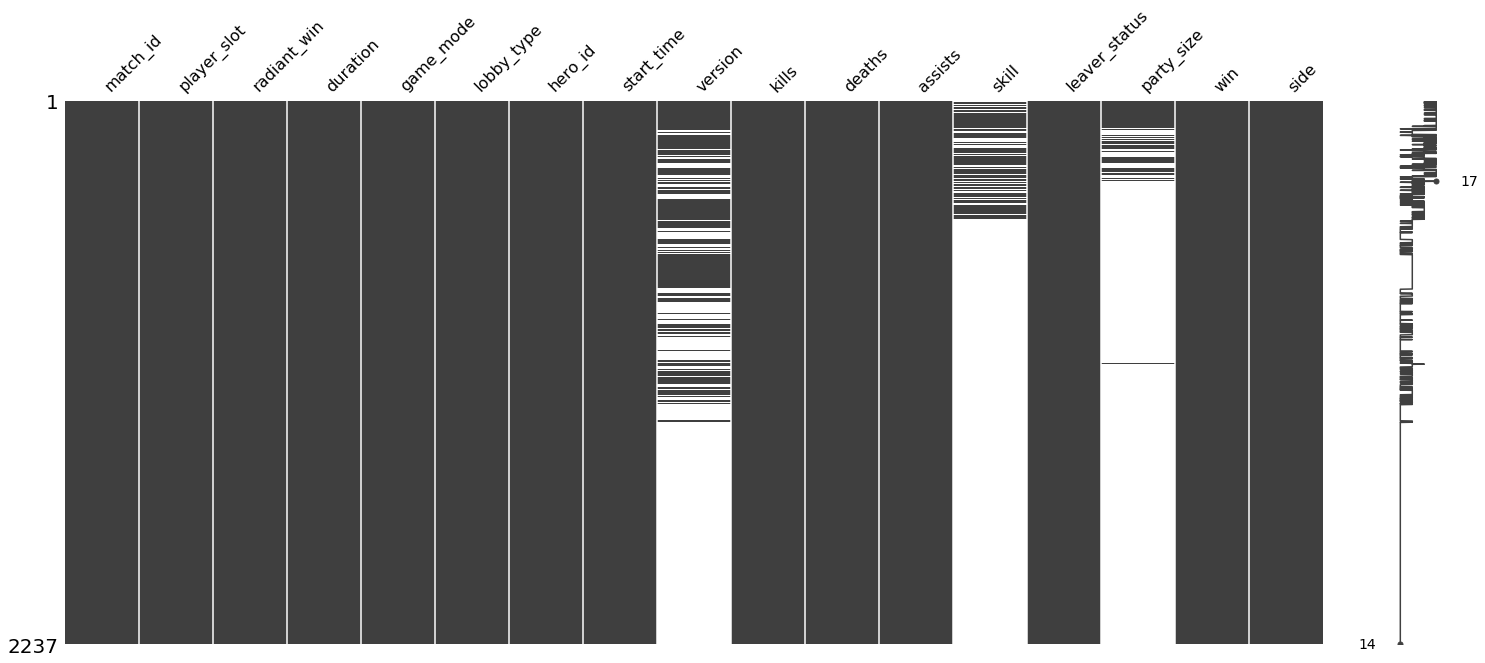

In [74]:
missingno.matrix(matches)

In [75]:
matches['start_time'].dt.year

0       2020
1       2020
1106    2020
1107    2020
2       2020
        ... 
2232    2012
2233    2012
2234    2012
2235    2012
2236    2012
Name: start_time, Length: 2237, dtype: int64

## Adding Hero Rating to the model

In [76]:
matches=pd.merge(matches,my_hero_rating,on='hero_id').sort_values(by=['match_id'],ascending=[False])
matches.head(10)

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side,localized_name,my_hero_rating
0,5276633973,131,False,2281,5,0,48,2020-03-05 19:35:27,21.0,4,1,7,1.0,0,5.0,1,Dire,Luna,3
15,5276593755,131,False,1888,4,0,4,2020-03-05 18:55:12,21.0,12,2,10,1.0,0,5.0,1,Dire,Bloodseeker,3
25,5275038518,131,True,3806,4,0,113,2020-03-04 19:52:17,21.0,8,6,12,1.0,0,4.0,0,Dire,Arc Warden,3
34,5274978088,2,False,2773,4,0,110,2020-03-04 18:56:38,21.0,3,7,8,1.0,0,5.0,0,Radiant,Phoenix,1
60,5273366450,0,True,4613,4,0,94,2020-03-03 19:04:22,21.0,10,5,25,NaN,0,5.0,1,Radiant,Medusa,3
79,5273307860,0,False,2247,22,0,51,2020-03-03 18:14:22,21.0,1,7,3,1.0,0,5.0,0,Radiant,Clockwerk,1
91,5271708812,4,True,3342,22,0,3,2020-03-02 18:26:33,21.0,5,3,20,NaN,0,5.0,1,Radiant,Bane,5
150,5271647888,129,False,2368,22,0,64,2020-03-02 17:28:31,21.0,4,3,16,1.0,0,5.0,1,Dire,Jakiro,3
170,5270163557,2,True,3180,3,0,87,2020-03-01 20:09:00,21.0,6,11,22,NaN,0,4.0,1,Radiant,Disruptor,5
186,5270095407,131,False,3137,4,0,65,2020-03-01 19:06:20,21.0,2,6,29,1.0,0,4.0,1,Dire,Batrider,5


In [77]:
matches.to_csv('abhisdata.csv')

In [78]:
matches.describe()

,match_id,player_slot,duration,game_mode,lobby_type,hero_id,version,kills,deaths,assists,skill,leaver_status,party_size,win,my_hero_rating
count,2.237000e+03,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,760.000000,2237.000000,2237.000000,2237.000000,354.000000,2237.000000,230.000000,2237.000000,2237.000000
mean,1.957954e+09,66.002682,2692.928029,3.632991,0.046044,51.436746,17.964474,4.637461,5.617345,13.110416,1.025424,0.039338,3.995652,0.494412,3.033974
std,1.563016e+09,64.088504,734.204034,5.164974,0.562012,31.241445,2.681622,3.900081,3.070173,7.628673,0.174680,0.247111,1.030105,0.500081,1.523433
min,2.658649e+07,0.000000,369.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
25%,3.584343e+08,2.000000,2196.000000,1.000000,0.000000,26.000000,17.000000,2.000000,3.000000,8.000000,1.000000,0.000000,3.000000,0.000000,2.000000
50%,2.018802e+09,4.000000,2622.000000,1.000000,0.000000,47.000000,17.000000,4.000000,5.000000,12.000000,1.000000,0.000000,4.000000,0.000000,3.000000
75%,3.000137e+09,130.000000,3108.000000,4.000000,0.000000,79.000000,21.000000,7.000000,8.000000,17.000000,1.000000,0.000000,5.000000,1.000000,5.000000
max,5.276634e+09,132.000000,6428.000000,22.000000,7.000000,128.000000,21.000000,30.000000,19.000000,61.000000,3.000000,4.000000,10.000000,1.000000,5.000000


In [79]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 418
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   match_id        2237 non-null   int64         
 1   player_slot     2237 non-null   int64         
 2   radiant_win     2237 non-null   bool          
 3   duration        2237 non-null   int64         
 4   game_mode       2237 non-null   int64         
 5   lobby_type      2237 non-null   int64         
 6   hero_id         2237 non-null   int64         
 7   start_time      2237 non-null   datetime64[ns]
 8   version         760 non-null    float64       
 9   kills           2237 non-null   int64         
 10  deaths          2237 non-null   int64         
 11  assists         2237 non-null   int64         
 12  skill           354 non-null    float64       
 13  leaver_status   2237 non-null   int64         
 14  party_size      230 non-null    float64       
 15  win  

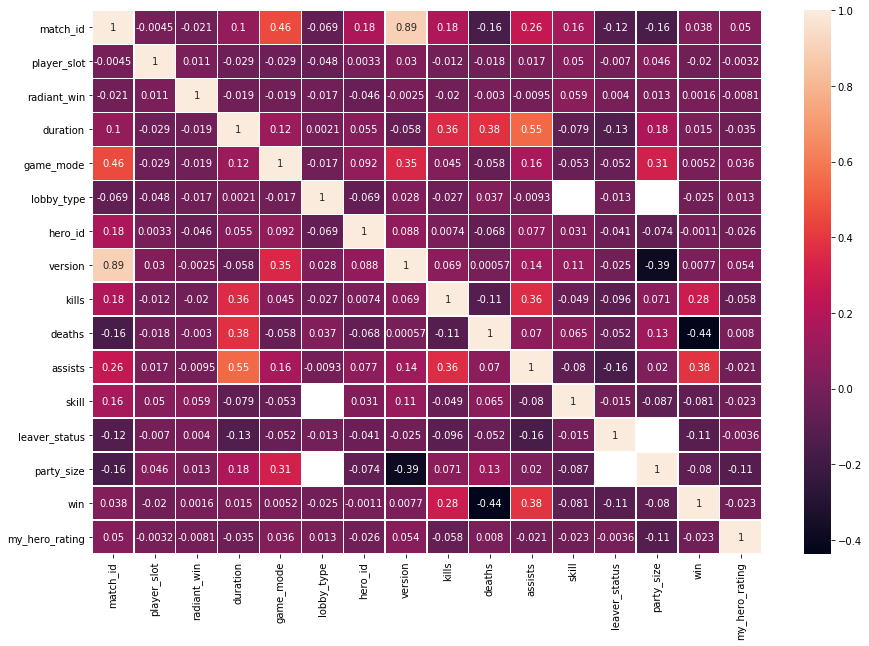

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(matches.corr(),annot=True,linewidths=0.3)
plt.show()

In [81]:
matches

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,leaver_status,party_size,win,side,localized_name,my_hero_rating
0,5276633973,131,False,2281,5,0,48,2020-03-05 19:35:27,21.0,4,1,7,1.0,0,5.0,1,Dire,Luna,3
15,5276593755,131,False,1888,4,0,4,2020-03-05 18:55:12,21.0,12,2,10,1.0,0,5.0,1,Dire,Bloodseeker,3
25,5275038518,131,True,3806,4,0,113,2020-03-04 19:52:17,21.0,8,6,12,1.0,0,4.0,0,Dire,Arc Warden,3
34,5274978088,2,False,2773,4,0,110,2020-03-04 18:56:38,21.0,3,7,8,1.0,0,5.0,0,Radiant,Phoenix,1
60,5273366450,0,True,4613,4,0,94,2020-03-03 19:04:22,21.0,10,5,25,NaN,0,5.0,1,Radiant,Medusa,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,26750720,130,True,2244,0,0,44,2012-07-18 04:25:54,NaN,2,11,2,NaN,0,NaN,0,Dire,Phantom Assassin,3
1715,26616850,1,False,3015,0,0,44,2012-07-17 13:09:27,NaN,5,9,7,NaN,0,NaN,0,Radiant,Phantom Assassin,3
2080,26603351,2,False,2602,0,0,77,2012-07-17 11:57:32,NaN,4,8,5,NaN,0,NaN,0,Radiant,Lycan,3
213,26594674,131,True,2550,0,0,9,2012-07-17 11:05:07,NaN,1,12,2,NaN,0,NaN,0,Dire,Mirana,3


In [82]:
df=matches.drop(['match_id','player_slot','radiant_win','lobby_type','start_time','version','skill','leaver_status','party_size','localized_name'],axis=1)

In [83]:
df

,duration,game_mode,hero_id,kills,deaths,assists,win,side,my_hero_rating
0,2281,5,48,4,1,7,1,Dire,3
15,1888,4,4,12,2,10,1,Dire,3
25,3806,4,113,8,6,12,0,Dire,3
34,2773,4,110,3,7,8,0,Radiant,1
60,4613,4,94,10,5,25,1,Radiant,3
...,...,...,...,...,...,...,...,...,...
1714,2244,0,44,2,11,2,0,Dire,3
1715,3015,0,44,5,9,7,0,Radiant,3
2080,2602,0,77,4,8,5,0,Radiant,3
213,2550,0,9,1,12,2,0,Dire,3


In [84]:
print(df['win'].value_counts())
print(df['win'].value_counts(normalize=True))

0    1131
1    1106
Name: win, dtype: int64
0    0.505588
1    0.494412
Name: win, dtype: float64


In [85]:
df=pd.get_dummies(df, prefix=['side'])
df.head()

,duration,game_mode,hero_id,kills,deaths,assists,win,my_hero_rating,side_Dire,side_Radiant
0,2281,5,48,4,1,7,1,3,1,0
15,1888,4,4,12,2,10,1,3,1,0
25,3806,4,113,8,6,12,0,3,1,0
34,2773,4,110,3,7,8,0,1,0,1
60,4613,4,94,10,5,25,1,3,0,1


In [86]:
df['hero_id'].max()

128

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [88]:
df['hero_id']=le.fit_transform(df['hero_id'])

In [89]:
y=df['win']
X=df.drop(['win'],axis=1)

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [91]:
X_sca=sc.fit_transform(X)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sca,y,test_size=0.33,random_state=0)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [94]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4),
    DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=4),
    RandomForestClassifier(n_estimators=100,max_depth=4),
    KNeighborsClassifier(n_neighbors=10),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [95]:

results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print('Recall score:',recall_score(y_test,y_pred),'\n')
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

[[304  61]
 [ 73 301]]
accuracy train: 0.7977303070761015 

accuracy test: 0.8186738836265224 

precision : 0.8314917127071824 

Recall score: 0.8048128342245989 

f1 score: 0.8179347826086958 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       365
           1       0.83      0.80      0.82       374

    accuracy                           0.82       739
   macro avg       0.82      0.82      0.82       739
weighted avg       0.82      0.82      0.82       739

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_we